# Compute Persistent Homology of 3-D Scans

### We have the middle segment from the 421 + 144 TCIA lung cancer samples formatted for analysis of Cubical Complexes

In [2]:
import numpy as np
import matplotlib.pylab as plt
import math
import os
import gudhi as gd
import pandas as pd
import PersistenceImages.persistence_images as pimg

### Test the persistent homology pipeline

In [3]:
def BitmapToPhom(bitmap):
    l,w = np.shape(bitmap)
    
    cubical = gd.CubicalComplex(dimensions = [l,w], top_dimensional_cells = bitmap.flatten())
    phom = cubical.compute_persistence()
    phom_0 = cubical.persistence_intervals_in_dimension(0)
    phom_1 = cubical.persistence_intervals_in_dimension(1)

    return(phom_0, phom_1)

In [4]:
#Function to isolate just the middle slice
def middle_slice(scan):
    
    nslices = len(scan)
    middle = math.ceil(nslices/2)
    middle_slice = scan[middle]
    
    return middle_slice

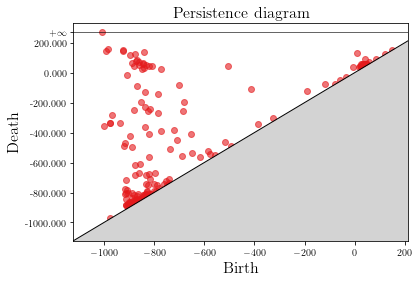

In [6]:
lung_test = np.load('./Radiomics_Arrays/LUNG1-101.npy')
middle_test = middle_slice (lung_test)
phom_0, phom_1 = BitmapToPhom(middle_test)
gd.plot_persistence_diagram(phom_0)

### Read in files and normalize

In [11]:
#Radiomics Dataset
directory = os.fsencode('./Radiomics_Arrays')

all_rad_middle_scans = []
rad_maxes = []
rad_mins = []

for file in os.listdir(directory):
    filename = './Radiomics_Arrays/' + os.fsdecode(file)
    lung = np.load(filename)
    middle = middle_slice(lung)
    rad_maxes.append(np.amax(middle))
    rad_mins.append(np.amin(middle))    
    all_rad_middle_scans.append(lung)
    

    
#Radiogenomics Dataset
directory = os.fsencode('./Radiogenomics_Arrays')

all_radg_middle_scans = []
radg_maxes = []
radg_mins = []

for file in os.listdir(directory):
    filename = './Radiogenomics_Arrays/' + os.fsdecode(file)
    lung = np.load(filename)
    middle = middle_slice(lung)
    radg_maxes.append(np.amax(middle))
    radg_mins.append(np.amin(middle))    
    all_radg_middle_scans.append(middle)

In [14]:
#We want to normalize to [0,1]
grand_max = max(np.max(rad_maxes), np.max(radg_maxes))
grand_min = max(np.min(rad_mins), np.min(radg_mins))

all_rad_middle_scans_normalized = (all_rad_middle_scans - grand_min) / (grand_max - grand_min)
all_radg_middle_scans_normalized = (all_radg_middle_scans - grand_min) / (grand_max - grand_min)

### Apply persistent homology pipeline to all files

In [17]:
#Radiomics Dataset

rad_phom_0s = []
rad_phom_1s = []

for tumor in all_rad_middle_scans_normalized:
    tumor_middle = middle_slice(tumor)
    rad_phom_0, rad_phom_1 = BitmapToPhom(tumor_middle)
    
    rad_phom_0s.append(rad_phom_0)
    rad_phom_1s.append(rad_phom_1)
    
    
#Radiogenomics Dataset

radg_phom_0s = []
radg_phom_1s = []

for tumor in all_radg_middle_scans_normalized:
    tummor_middle = middle_slice(tumor)
    radg_phom_0, radg_phom_1 = BitmapToPhom(tumor_middle)
    
    radg_phom_0s.append(radg_phom_0)
    radg_phom_1s.append(radg_phom_1)


### Save persistent homology files so I only need to run this once

In [18]:
np.save('./Radiomics_Homology/rad_phom_middle_0s.npy', rad_phom_0s)
np.save('./Radiomics_Homology/rad_phom_middle_1s.npy', rad_phom_1s)

np.save('./Radiogenomics_Homology/radg_phom_middle_0s.npy', radg_phom_0s)
np.save('./Radiogenomics_Homology/radg_phom_middle_1s.npy', radg_phom_1s)
